# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

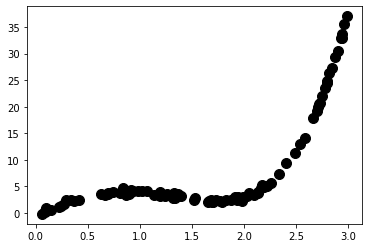

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([27.04687892,  0.18481015, 10.10955162,  6.81860455, 23.82752556,
        2.10379177,  6.18582951,  0.52216715,  0.5789681 ,  0.25053277,
        9.14536074,  0.87467179, 16.62387515,  1.23602261,  0.68722324,
        5.56993097, 19.48180664, 10.24220514,  0.97407216,  6.59990626,
        6.9975051 , 11.1717304 ,  4.24899923,  4.92019848,  0.10427012,
        7.03948422,  0.86328506,  5.44935031, 20.3248853 ,  1.08516271,
        0.92670026,  3.44830572, 10.62142312, 27.62678257,  5.59886109,
        0.29408035, 24.67498736, 25.36701372,  6.0541982 , 21.02384912])

In [7]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.7651264867577338
Explained variance score: 0.7651264867577338
Median absolute error: 3.1801924615306625
Mean squared error: 13.80582350743298
Mean absolute errors: 3.239784281681699


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [8]:
degs = [1, 2, 3, 4, 5, 25]

for i in degs:
    model = make_pipeline(PolynomialFeatures(i), linear_model.LinearRegression())
    model.fit(X_train, y_train)
    
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    print()


Explained variance score: 0.5104612636004036
Median absolute error: 3.507974797728843
Mean squared error: 28.871629539491742
Mean absolute errors: 4.289747385560858

Explained variance score: 0.7651264867577338
Median absolute error: 3.1801924615306625
Mean squared error: 13.80582350743298
Mean absolute errors: 3.239784281681699

Explained variance score: 0.9905971376861733
Median absolute error: 0.4170251604621875
Mean squared error: 0.5563257750839735
Mean absolute errors: 0.5798392243583355

Explained variance score: 0.9986417542148096
Median absolute error: 0.20049216035009598
Mean squared error: 0.08127675659625426
Mean absolute errors: 0.22614771553037044

Explained variance score: 0.9986543834042794
Median absolute error: 0.2009058727372497
Mean squared error: 0.08056171020583917
Mean absolute errors: 0.22553234251347826

Explained variance score: 0.9957314612239944
Median absolute error: 0.17671627539248136
Mean squared error: 0.2514404058381863
Mean absolute errors: 0.31606736